# Assignment3


In [236]:
import numpy as np
import matplotlib.pyplot as plt
from arrowline import *

## Q1
Apprpximate the fixed points of each function. The Answer should be accurate to 12 decimal places.

In [237]:

def fixed_point_root_finding(fun,x0,x_start,x_end,lamda = 0.01):
    fig,ax = plt.subplots()
    ax.grid(True)
    x1 = x0+lamda*(fun(x0)-x0)
    error = abs(x1-x0)
    counter = 0
    x_buffer = [x0]
    last_plot_x0 = x0
    last_plot_y0 = fun(x0)
    while error>1e-11:
        x1 = x0+lamda*(fun(x0)-x0)
        y0 = fun(x0)
        y1 = fun(x1)
        error = abs(x1-x0)
        if counter%5==0 and counter>0:
            ax.plot(np.array([x0,x0]),np.array([0,y0]),linestyle='--',color='b')
            arrowline(ax,[last_plot_x0,x0],[last_plot_y0,y0],arrow_size=1,d_frac=1,color='g')
            ax.scatter(np.array([last_plot_x0,x0]),np.array([last_plot_y0,y0]),color='r')
            last_plot_x0 = x0
            last_plot_y0 = y0
        if counter%2==0:
            x_buffer.append(x1)
        x0 = x1
        counter +=1 
        if counter>1000:
            break
    
    x_ = np.linspace(min(min(x_buffer),x_start),max(x_end,max(x_buffer)),1000)
    y_ = fun(x_)
    ax.plot(x_,y_)
    ax.plot(x_,x_)
    ax.plot(x_,np.zeros_like(x_),color='black')
    plt.scatter(x1,fun(x1),color='y')
    return x1,fun(x1),error


$g(x)-x = x^5-7x^3-2x^2+2-x = 0$ and we can choose $ x = x+0.02(g(x)-x)$ to iterate to find the fixed point.


0.5191607463130115 0.5191607467194601 9.764189456973327e-12


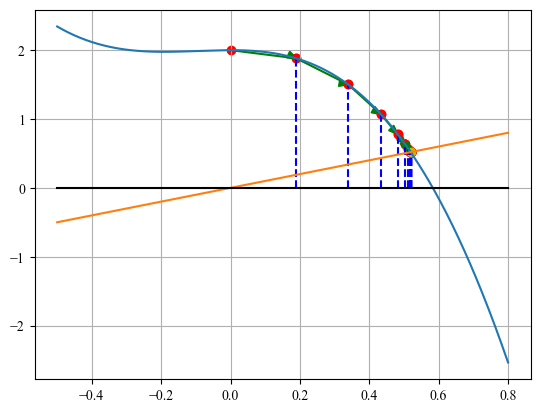

In [238]:
def fun1(x_):
    return x_**5-7*x_**3-2*x_**2+2

p,fp,error = fixed_point_root_finding(fun=fun1,x0=0,x_start=-0.5,x_end=0.8,lamda=0.02)
print(p,fp,error)


$g(x)-x = sin(cos x)-x = 0$ and we can choose $x=x+0.5(sin(cos x)-x)$

0.6948196907322375 0.69481969073012 3.924416347445003e-12


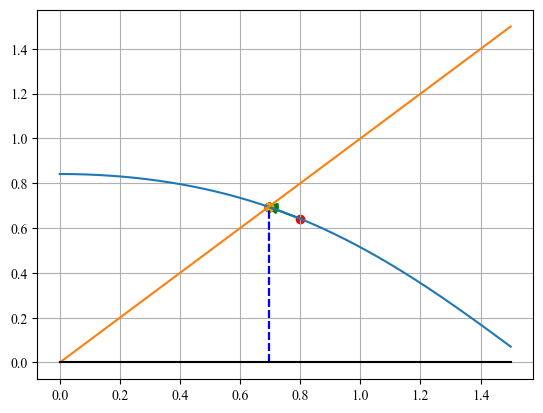

In [239]:
def fun2(x_):
    return np.sin(np.cos(x_))
x =np.linspace(-100,100,500)
p,fp,error = fixed_point_root_finding(fun=fun2,x0=0.8,x_start=0,x_end=1.5,lamda=0.5)
print(p,fp,error)

$g(x)-x = x^2sin(x+\frac{\pi}{3})-x = 0$ and we can choose $x = x+0.01*(g(x)-x)$

-3.931616409655361 -3.9316164105058973 9.884093543632844e-12


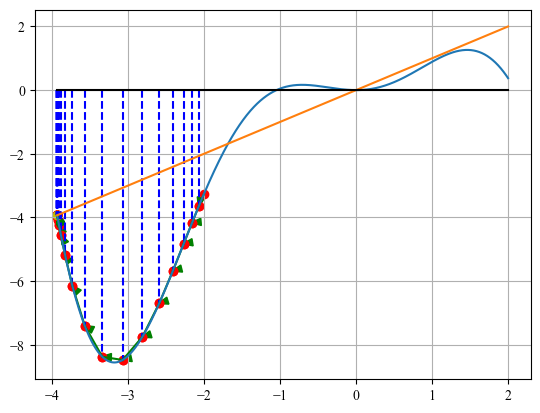

In [240]:
def fun3(x_):
    return x_**2*np.sin(x_+np.pi/3)
p,fp,error = fixed_point_root_finding(fun=fun3,x0=-2,x_start=-2,x_end=2,lamda=0.01)
print(p,fp,error)

$g(x)-x = x^2+sin(x+\frac{\pi}{3})-x = 0$ and we can choose $x = x+0.01*(g(x)-x)$
From the figure below, there is no fixed point.

1.91597900729675 3.8484465910592984 0.0038507311650297638


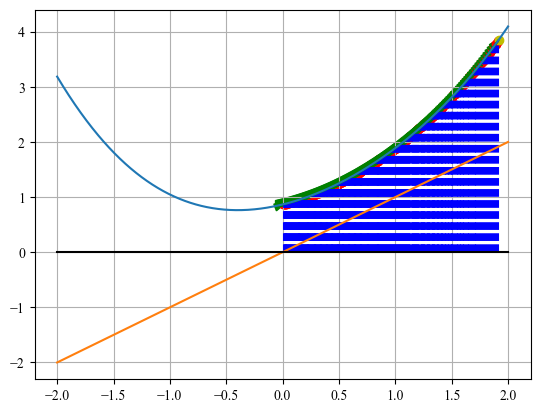

In [241]:
def fun4(x_):
    return x_**2+np.sin(x_+np.pi/3)
p,fp,error = fixed_point_root_finding(fun=fun4,x0=0,x_start=-2,x_end=2,lamda=0.002)
print(p,fp,error)

## Q2
The question means to find a solution $I$ that:
$$
F = \sum_{t=0}^{360}300(1+I)^t=300(\frac{(1+I)^{360}-1}{I})=600000
$$
Use Fixed-Point Method to find a solution
Construct $g(x)=log[(1+I)^{360}-1]-log(I)-log(2000)$, we can use $x=x-0.01(g(x))$ to iterate.


In [271]:
def F(x):
    return np.log((1+x)**360-1)-np.log(x)-np.log(2000)
x0 = 0.1
lamda = 0.001
x1 = x0-lamda*(F(x0))
error = abs(x0-x1)
count  = 0
while error>1e-10:
    x1 = x0-lamda*(F(x0))
    error = abs(x1-x0)
    x0 = x1
    count+=1
    if count>1e4:
        break

print(x0,F(x0),error,count)
print(300*((1+x0)**360-1)/x0)


0.007851866155583935 5.886663245746604e-08 7.87600228091545e-11 66
600000.0353199804


## Q3
(1) The distance between $(x,x^2)$ and (4,1) is $d=\sqrt{(x-4)^2+(x^2-1)^2}$.

We can find the root of $(d^2)' = 4x^3-2x-8$, and choose the correct global minimum.

Using fixed-point method, to find $g(x)=4x^3-2x-8=0$, we can use $x = x-0.01(g(x))$ to iterate. 


1.3917687725669161 7.040092953047861e-09 8.939138318453388e-11 85


(-4.4, 4.4, -0.7999831663495327, 16.799999198397597)

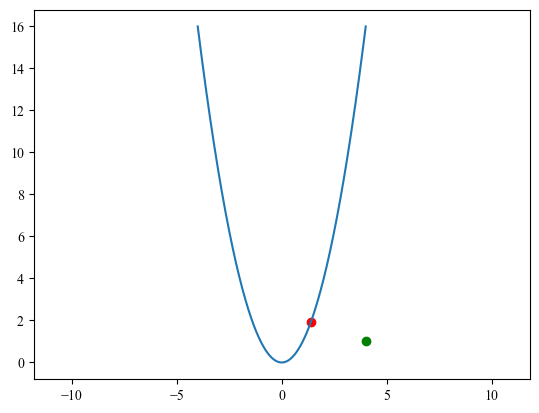

In [244]:
def fun_min_d(x):
    return 4*x**3-2*x-8
x0 = 4
lamda = 0.01
x1 = x0-lamda*(fun_min_d(x0))
error = abs(x0-x1)
count  = 0
while error>1e-10:
    x1 = x0-lamda*(fun_min_d(x0))
    error = abs(x1-x0)
    x0 = x1
    count+=1
    if count>1e4:
        break

print(x0,fun_min_d(x0),error,count)
fig,ax = plt.subplots()
x_ = np.linspace(-4,4,1000)
ax.plot(x_,x_**2)
plt.scatter([x0],[x0**2],color='r')
plt.scatter([4],[1],color='g')
plt.axis('equal')

(b) Using the same method
$$
g(x) = (d^2)' = 2x-10+2[sin(x-cos(x))+0.4][cos(x-cos(x))][1-sin(x)]
$$
And we can construct $x = x-0.01*(g(x))$ to iterate.


5.007687094346103 -9.67742510779579e-09 9.85949100140715e-11 1017


(3.8, 8.2, -1.099999648729851, 1.0999926233268686)

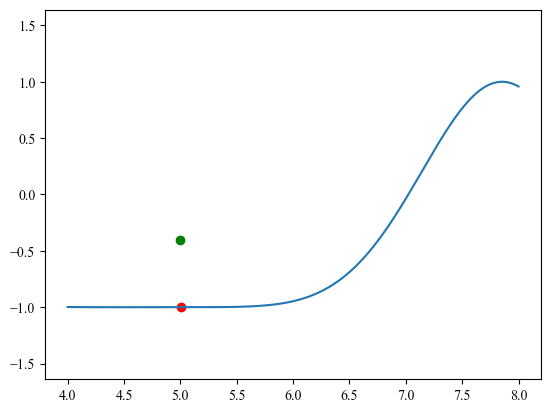

In [245]:
def fun_min_d2(x):
    return 2*x-10+2*(np.sin(x-np.cos(x)+0.4))*np.cos(x-np.cos(x))*(1-np.sin(x))
x0 = 4
lamda = 0.01
x1 = x0-lamda*(fun_min_d2(x0))
error = abs(x0-x1)
count  = 0
while error>1e-10:
    x1 = x0-lamda*(fun_min_d2(x0))
    error = abs(x1-x0)
    x0 = x1
    count+=1
    if count>1e4:
        break

print(x0,fun_min_d2(x0),error,count)
fig,ax = plt.subplots()
x_ = np.linspace(4,8,1000)
ax.plot(x_,np.sin(x_-np.cos(x_)))
plt.scatter([x0],[sin(x0-cos(x0))],color='r')
plt.scatter([5],[-0.4],color='g')
plt.axis('equal')

## Q4
Find the solution of $f(x)=x^3-x-3$ using Newton-Raphson Method.

From the result we can see that, choose the initial value $P_0=2$ can help us to get the solution faster, because it is closer to the true value $x = 1.67169$

In [250]:
def fun(x):
    return x**3-x-3
def diff_fun(x):
    return 3*x**2-1
x0 = 0
x1 = x0-fun(x0)/diff_fun(x0)
error = abs(x1-x0)
lamda = 0.5
counter = 0
while error>1e-10:
    x1 = x0-lamda*fun(x0)/diff_fun(x0)
    error = abs(x0-x1)
    x0 = x1
    counter += 1
    if counter>1e4:
        break
print('P0 = 0, result = {}, counter = {}'.format(x0,counter))

x0 = 2
x1 = x0-fun(x0)/diff_fun(x0)
error = abs(x1-x0)
lamda = 0.5
counter = 0
while error>1e-10:
    x1 = x0-lamda*fun(x0)/diff_fun(x0)
    error = abs(x0-x1)
    x0 = x1
    counter += 1
    if counter>1e4:
        break
print('P0 = 2, result = {}, counter = {}'.format(x0,counter))



P0 = 0, result = 1.6716998815702, counter = 86
P0 = 2, result = 1.6716998817141608, counter = 33


## Q5
Assume the distance between the plane and the origin is $d \in (0,1)$ and the radius of the sphere is 1. 

The volume of the two parts are $V_1 =\int_{d}^{1} \pi(1-x^2)dx=\frac{\pi}{3}d^3-\pi d+\frac{2}{3}\pi $ and $V_2 = \frac{4}{3}\pi r^2 - V_1$ respectively.

And $3V_1 = V_2$, so we can construct $g(d)=d^3-3d+1=0$

Using Newton-Raphson to find the solution.

P0 = 0, result = 0.3472963552404585, counter = 32
V1 = 1.047197551454637, V2 = 3.1415926533317533


(-1.1, 1.1, -1.1, 1.1)

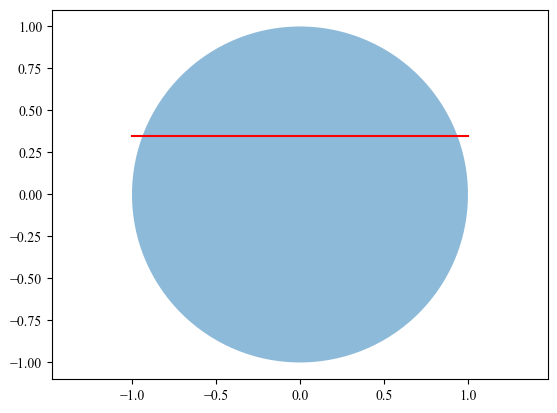

In [259]:
def fun(x):
    return x**3-3*x+1
def diff_fun(x):
    return 3*x**2-3
from matplotlib.patches import Ellipse, Circle
x0 = 0
x1 = x0-lamda*fun(x0)/diff_fun(x0)
error = abs(x1-x0)
lamda = 0.5
counter = 0
while error>1e-10:
    x1 = x0-lamda*fun(x0)/diff_fun(x0)
    error = abs(x0-x1)
    x0 = x1
    counter += 1
    if counter>1e4:
        break

V1 = np.pi*2/3-np.pi*x0+np.pi/3*x0**3
V2 = np.pi*4/3-V1
print('P0 = 0, result = {}, counter = {}'.format(x0,counter))
print('V1 = {}, V2 = {}'.format(V1,V2))

fig,ax = plt.subplots()
c = Circle(xy=(0,0),radius=1,alpha = 0.5)
ax.add_patch(c)
x_ = np.linspace(-1,1,100)
y_ = x0*np.ones_like(x_)
plt.plot(x_,y_,color='r')
plt.axis('equal')